In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import classification_report
from warnings import simplefilter
import matplotlib.pyplot as plt

In [60]:
data=pd.read_csv("titanic.csv").as_matrix()
simplefilter(action='ignore',category=FutureWarning)
print(data)

[[1.00000e+00 2.20000e+01 7.25000e+00 ... 3.00000e+00 2.00000e+00
  0.00000e+00]
 [2.00000e+00 3.80000e+01 7.12833e+01 ... 1.00000e+00 0.00000e+00
  1.00000e+00]
 [3.00000e+00 2.60000e+01 7.92500e+00 ... 3.00000e+00 2.00000e+00
  1.00000e+00]
 ...
 [1.30700e+03 3.85000e+01 7.25000e+00 ... 3.00000e+00 2.00000e+00
  0.00000e+00]
 [1.30800e+03 2.80000e+01 8.05000e+00 ... 3.00000e+00 2.00000e+00
  0.00000e+00]
 [1.30900e+03 2.80000e+01 2.23583e+01 ... 3.00000e+00 0.00000e+00
  0.00000e+00]]


In [61]:
X=data[:,:8]
Y=data[:,8]
X=X.astype(int)
Y=Y.astype(int)

In [62]:
acc_svm=[]
#j=-5
#k=2**i

for i in range(10,110,10):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=i)
    svm=SVC(C=i,kernel='rbf',gamma='auto_deprecated',probability=True)
    svm.fit(X_train,Y_train)
    Y_pred=svm.predict(X_test)
    lc=0
    for j in range(len(Y_test)):
        if(Y_test[j]-Y_pred[j]==0):
                lc+=1
    acc_svm.append(lc/len(Y_test))
    #j+=2
    #k=2**j


print(acc_svm)
l=np.asarray(acc_svm).mean()
print(l)
# print(np.asarray(a_svm).mean())

[0.7150127226463104, 0.6946564885496184, 0.6895674300254453, 0.7455470737913485, 0.7811704834605598, 0.7379134860050891, 0.7379134860050891, 0.72264631043257, 0.7531806615776081, 0.7430025445292621]
0.7320610687022902


Text(0, 0.5, 'accuracy')

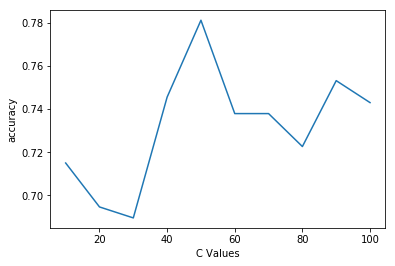

In [63]:
x=[m for m in range(10,110,10)]
plt.plot(x,acc_svm)
plt.xlabel('C Values')
plt.ylabel('accuracy')

In [64]:
ls=LogisticRegression()
cls=[]
for j in range(10):
    k_fold = KFold(n_splits=5, shuffle=True, random_state=j)
    for train,test in k_fold.split(data):
        X_train,X_test=X[train],X[test]
        Y_train,Y_test=Y[train],Y[test]
        ls.fit(X_train,Y_train)
        Y_pred=ls.predict(X_test)
        lc=0
        for i in range(len(Y_test)):
            if(Y_test[i]-Y_pred[i]==0):
                lc+=1
        cls.append(lc/len(Y_test))
#print(cls
m=np.asarray(cls).mean()
print(m)

0.7437761399198619


In [65]:
dc=DecisionTreeClassifier()
acc_dc=[]
for j in range(10):
    k_fold = KFold(n_splits=5, shuffle=True, random_state=j)
    for train,test in k_fold.split(data):
        X_train,X_test=X[train],X[test]
        Y_train,Y_test=Y[train],Y[test]
        dc.fit(X_train,Y_train)
        Y_pred=dc.predict(X_test)
        lc=0
        for i in range(len(Y_test)):
            if(Y_test[i]-Y_pred[i]==0):
                lc+=1
        acc_dc.append(lc/len(Y_test))
#print(cls
n=np.asarray(acc_dc).mean()
print(n)

0.8313225702670293


In [66]:
adb=AdaBoostClassifier(n_estimators=100, random_state=0)
acc_adb=[]
for j in range(10):
    k_fold = KFold(n_splits=5, shuffle=True, random_state=j)
    for train,test in k_fold.split(data):
        X_train,X_test=X[train],X[test]
        Y_train,Y_test=Y[train],Y[test]
        adb.fit(X_train,Y_train)
        Y_pred=adb.predict(X_test)
        lc=0
        for i in range(len(Y_test)):
            if(Y_test[i]-Y_pred[i]==0):
                lc+=1
        acc_adb.append(lc/len(Y_test))
#print(cls
p=np.asarray(acc_adb).mean()
print(p)

0.8546237313913019


Text(0, 0.5, 'Accuracy')

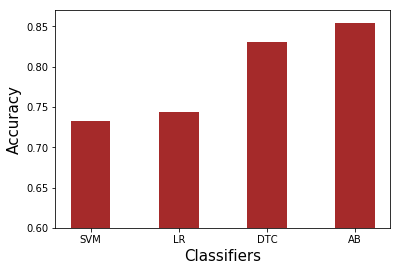

In [67]:
x=["SVM","LR","DTC","AB"]
y=[l,m,n,p]
width=0.45
plt.ylim([0.6,0.87])
plt.bar(x,y,width,color="brown")
plt.xlabel('Classifiers',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)

In [124]:
data2=pd.read_csv("covtype.csv")
data2=data2.sample(n=2000,random_state=2)
simplefilter(action='ignore',category=FutureWarning)
print(data2)

        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
435551       3221      39     16                               591   
516340       3348      97     12                               618   
391977       3114     177     20                               376   
238410       3081      43     12                               600   
254966       2003      51     29                                30   
572308       2739      61     17                               242   
187553       3028     294     13                               162   
57208        3100     353     15                               787   
46912        2985      60      8                               466   
220526       2922     332     14                               390   
174481       3193     262      5                               390   
269941       2963      71     16                               454   
202960       2942      87     22                               182   
210399       3312   

In [125]:
data2=data2.as_matrix()
X=data2[:,:54]
Y=data2[:,54]

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2)

svm = SVC(C=1,kernel='rbf',gamma='auto_deprecated',probability=True) 
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
lc = 0
for i in range(0,len(Y_test)):
    if (Y_test[i]-Y_pred[i])==0:
        lc += 1
acc_svm = lc/len(Y_test)

print(acc_svm)

0.528


In [127]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       171
           2       0.53      1.00      0.69       264
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00        18

   micro avg       0.53      0.53      0.53       500
   macro avg       0.08      0.14      0.10       500
weighted avg       0.28      0.53      0.36       500



/home/aishee/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
